# Домашняя работа №1

In [3]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
def plot_one_image(image: np.ndarray, title=None) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.
    
    :param image: изображение для отображения
    :return: None
    """
    fig, axs = plt.subplots(1, 1, figsize=(8, 7))
    
    axs.imshow(image)
    axs.axis('off')
    if title:
        axs.set_title(title)
    plt.plot()

# Задача №1 - Лабиринт

Реализуйте алгоритм поиска выхода из лабиринта по растровому изобажению.
Вам нужно написать код, который будет находить путь (координаты пикселей) от заданного входа сверху до выхода снизу.

Отрисуйте получившийся маршрут на карте с помощью функции ```plot_maze_path(img, coords)``` или воспользуйтесь вам известным графическим инструментом.

__Input:__

Изображение лабиринта в кодировке $RGB$.

Все карты лежат на [яндекс-диске](https://yadi.sk/d/qEWVZk2picDdZw)

__Ouput:__

Массив координат пути через лабиринт в виде ```(np.array(x), np.array(y))```. 

Оценивается __каждое__ успешное решение лабиринта.
Пример решенной задачи.<img src="https://b.radikal.ru/b22/1906/56/df991f2221a7.png" width="300">

In [23]:
from task_1 import find_way_from_maze

In [16]:
def plot_maze_path(image: np.ndarray, coords: tuple) -> np.ndarray:
    """
    Нарисовать путь через лабиринт на изображении. 
    Вспомогательная функция.
     
    :param image: изображение лабиринта
    :param coords: координаты пути через лабиринт типа (x, y) где x и y - массивы координат точек
    :return img_wpath: исходное изображение с отрисованными координатами 
    """
    if image.ndim != 3:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        
    img_wpath = image.copy()
    if coords:
        x, y = coords
        img_wpath[x, y, :] = [0, 0, 255]

    return img_wpath

Загрузим тестовое изображение и отобразим его.

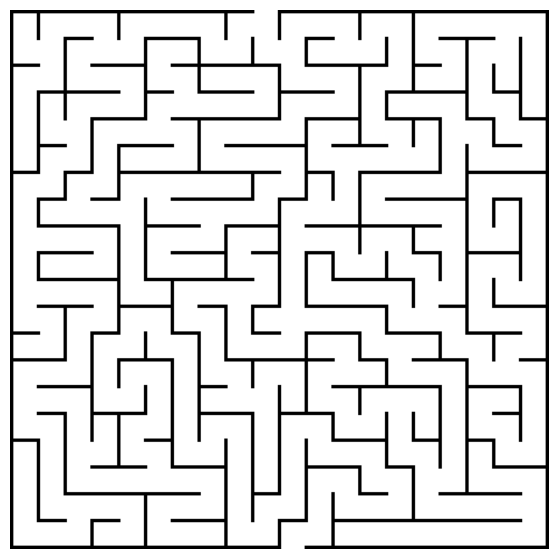

In [24]:
test_image = cv2.imread('task_1/20 by 20 orthogonal maze.png')  # загрузить тестовую картинку

plot_one_image(test_image)

Теперь ваша задача реализовать функцию ```plot_maze_path``` в ```task_1.py``` для того, чтобы найти координаты пути через лабиринт.

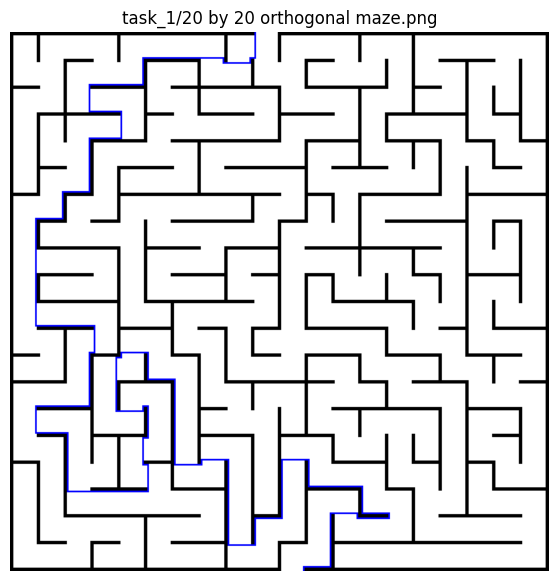

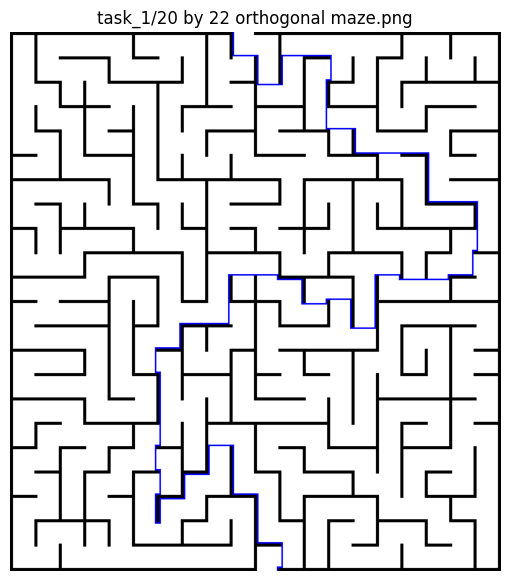

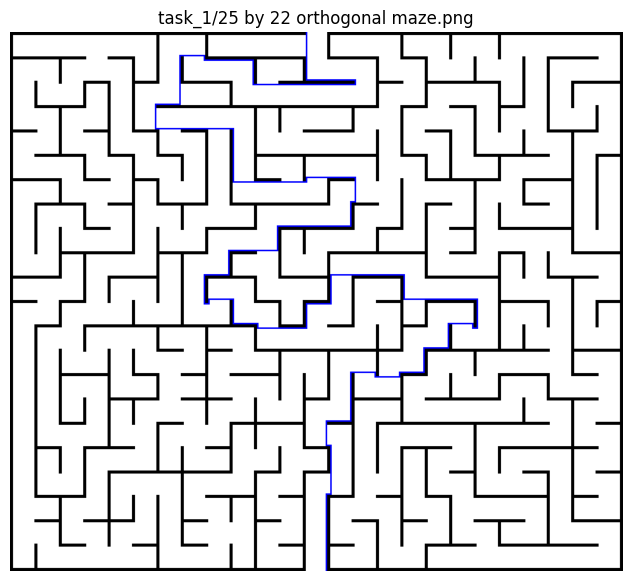

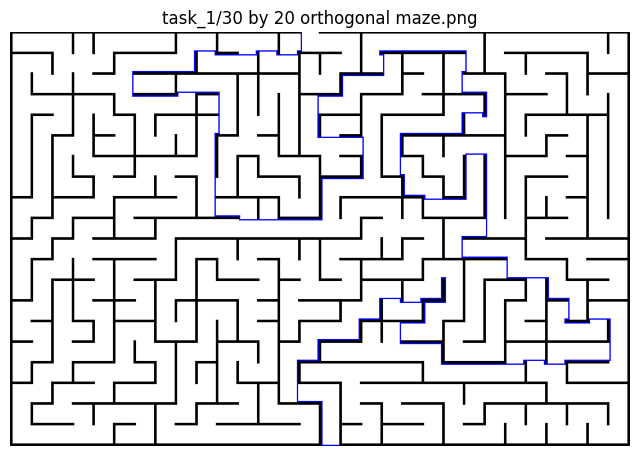

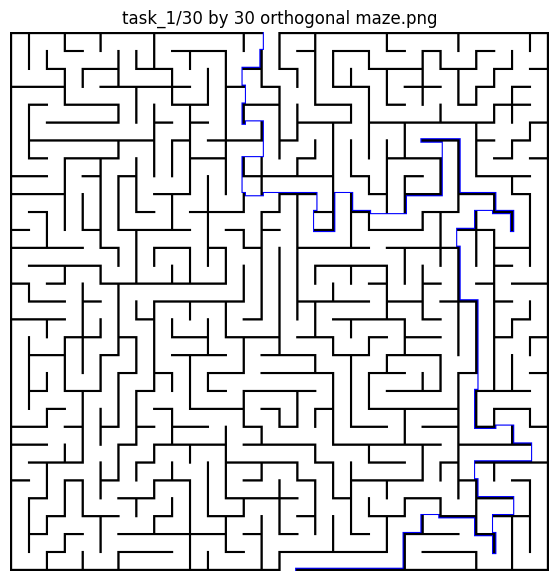

In [32]:

import cv2
import numpy as np
from pyparsing import deque

def find_way_from_maze_test(image: np.ndarray) -> tuple:
    """
    Найти путь через лабиринт.

    :param image: изображение лабиринта
    :return: координаты пути из лабиринта в виде (x, y), где x и y - это массивы координат
    """
     # Преобразуем изображение в градации серого
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV)

    height, width = binary_mask.shape

    # Находим начальную и конечную точки
    start_point = None
    end_point = None
    for i in range(height):
        for j in range(width):
            if binary_mask[i, j] == 0:
                start_point = (i, j)
                break
        if start_point is not None:
            break

    for i in range(height - 1, -1, -1):
        for j in range(width - 1, -1, -1):
            if binary_mask[i, j] == 0:
                end_point = (i, j)
                break
        if end_point is not None:
            break

    if start_point is None or end_point is None:
        print("Не удалось найти вход или выход")
        return None

    # Направления для движения (вверх, вниз, влево, вправо)
    movements = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    # Используем очередь для реализации алгоритма поиска
    queue = deque([start_point])
    visited_nodes = set()
    visited_nodes.add(start_point)
    # Словарь для хранения родительских узлов
    parent_map = {start_point: None}

    while queue:
        current_node = queue.popleft()

        # Если достигли конечной точки, выходим из цикла
        if current_node == end_point:
            break

        for move in movements:
            neighbor_node = (current_node[0] + move[0], current_node[1] + move[1])

            # Проверяем границы изображения и условия для добавления соседнего узла в очередь
            if (0 <= neighbor_node[0] < height and
                0 <= neighbor_node[1] < width and
                binary_mask[neighbor_node] == 0 and
                neighbor_node not in visited_nodes):

                visited_nodes.add(neighbor_node)
                queue.append(neighbor_node)
                parent_map[neighbor_node] = current_node

    # Восстанавливаем путь от конечной точки к начальной
    coords = []
    step = end_point

    while step is not None:
        coords.append(step)
        step = parent_map.get(step)

    coords.reverse()  # Переворачиваем список для получения правильного порядка координат
    x_coords, y_coords = ([], [])

    if coords:
        x_coords, y_coords = zip(*coords)  # Разделяем координаты на x и y

    return (x_coords, y_coords)

# Список названий изображений
image_names = [
    'task_1/20 by 20 orthogonal maze.png',
    'task_1/20 by 22 orthogonal maze.png',
    'task_1/25 by 22 orthogonal maze.png',
    'task_1/30 by 20 orthogonal maze.png',
    'task_1/30 by 30 orthogonal maze.png'
]

# Цикл по названиям изображений
for image_name in image_names:
    test_image = cv2.imread(image_name)
    if test_image is None:
        print(f"Не удалось загрузить изображение: {image_name}")
        continue
    way_coords = find_way_from_maze_test(test_image)  # вычислить координаты пути через лабиринт
    image_with_way = plot_maze_path(test_image, way_coords)
    plot_one_image(image_with_way, image_name)

# Задача №2 - Пробки в городе

Требуется написать программу, которая на вход принимает картинку, на которой схематически изображена машинка на дороге с $N$ полосами и препятствия на полосах. Соответствующие объекты обозначены цветами, которые сохраняются на всех изображениях. 

Результатом работы программы является номер полосы, на которую нужно перестроиться или сообщение о том, что перестраиваться не нужно.

**Примечание: номер дороги считается слева направо, отсчет начинается с нуля.**

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/8z84sJG/image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/Z6m4XFz/image_01.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [ ]:
from task_2 import find_road_number

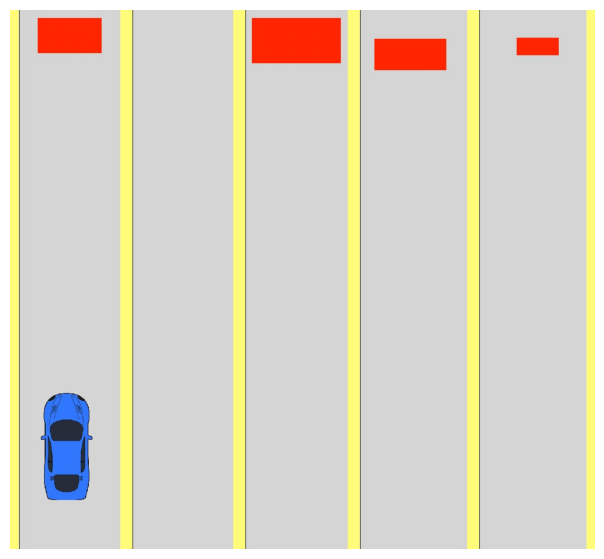

In [33]:
test_image = cv2.imread('task_2/image_00.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

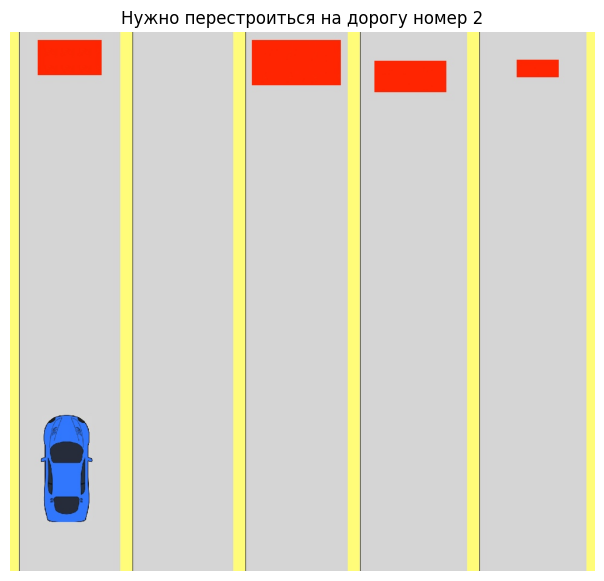

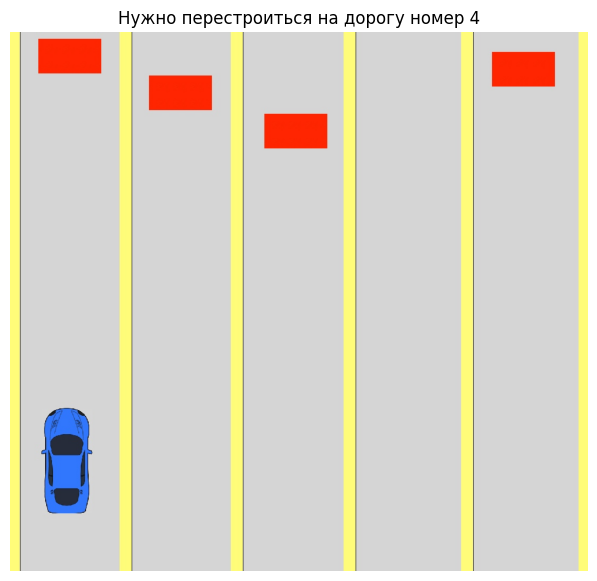

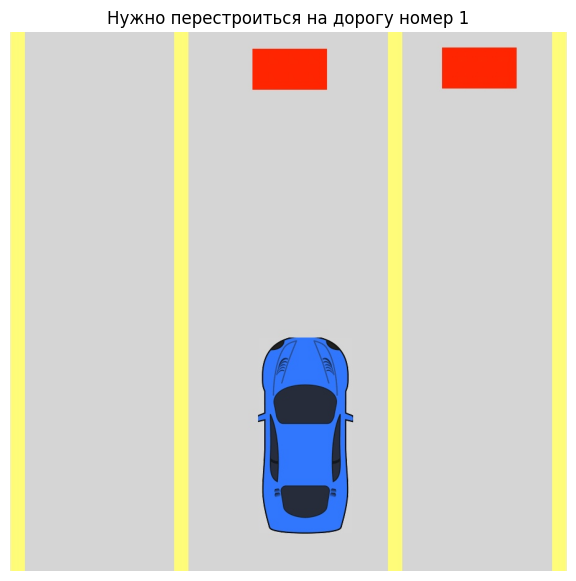

In [41]:
import cv2
import numpy as np

def find_road_number_test(image):
    # Определяем диапазоны для серого и красного цветов
    gray_range_min = (200, 200, 200)
    gray_range_max = (220, 220, 220)
    red_range_min = (230, 0, 0)
    red_range_max = (255, 50, 50)

    # Создаем маски для серого и красного цветов
    mask_gray = cv2.inRange(image, gray_range_min, gray_range_max)
    mask_red = cv2.inRange(image, red_range_min, red_range_max)

    # Ищем контуры серых дорожек
    gray_contours, _ = cv2.findContours(mask_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Переворачиваем список контуров для правильной обработки
    gray_contours = gray_contours[::-1]
    
    road_index = None

    # Проходим по каждому контуру серой дорожки
    for index, contour in enumerate(gray_contours):
        x, y, width, height = cv2.boundingRect(contour)
        
        # Извлекаем область красного цвета в пределах найденного прямоугольника
        road_area = mask_red[y:y + height, x:x + width]
        
        # Проверяем наличие красного цвета в области
        if np.sum(road_area) == 0:
            road_index = index + 1
            break

    return road_index

#road_number = find_road_number_test(test_image)

#print(f'Нужно перестроиться на дорогу номер {road_number}')
image_names = [
    'task_2/image_00.jpg',
    'task_2/image_01.jpg',
    'task_2/image_02.jpg'
]

# Цикл по названиям изображений
for image_name in image_names:
    test_image = cv2.imread(image_name)
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    road_number = find_road_number_test(test_image)
    plot_one_image(test_image, f'Нужно перестроиться на дорогу номер {road_number}')

# Задача №3 - Аффинные преобразования

## Задача №3.1 - Поверни изображение

Реализуйте функцию, которая поворачивает изображение вокруг заданной точки на заданный угол ($0^\circ-360^\circ$) и преобразует размер изображения, чтобы оно не обрезалось после поворота.

In [43]:
from task_3 import rotate

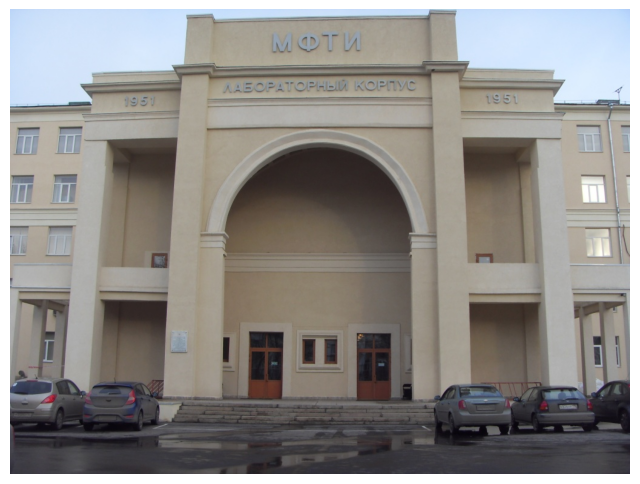

In [42]:
test_image = cv2.imread('task_3/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

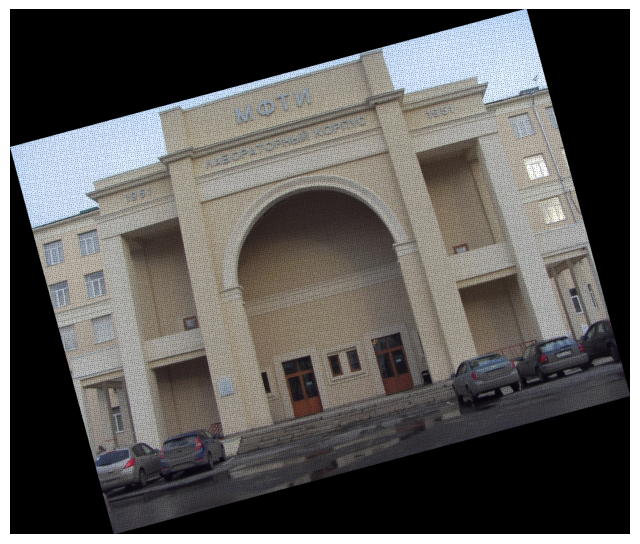

In [ ]:
import cv2
import numpy as np
import numpy as np
import math
test_point = (200, 200)
test_angle = 15


def transform_coords(x, y, angle):
        rad_angle = math.radians(angle)
        new_x = x * math.cos(rad_angle) - y * math.sin(rad_angle)
        new_y = x * math.sin(rad_angle) + y * math.cos(rad_angle)
        return new_x, new_y

def rotate_test(image, point: tuple, angle: float) -> np.ndarray:
    """
    Повернуть изображение по часовой стрелке на угол от 0 до 360 градусов и преобразовать размер изображения.

    :param image: исходное изображение
    :param point: значение точки (x, y), вокруг которой повернуть изображение
    :param angle: угол поворота
    :return: повернутное изображение
    """
    angle = -angle
    height, width, _ = image.shape
    x_min, x_max = width, 0
    y_min, y_max = height, 0

    # Находим новые границы изображения
    for y in range(height):
        for x in range(width):
            new_x, new_y = transform_coords(x, y, angle)
            x_min = min(x_min, int(new_x))
            x_max = max(x_max, int(new_x))
            y_min = min(y_min, int(new_y))
            y_max = max(y_max, int(new_y))

    new_height = y_max - y_min + 1
    new_width = x_max - x_min + 1
    rotated_image = np.zeros((new_height, new_width, 3), dtype=int)

    # Заполняем новое изображение
    for y in range(height):
        for x in range(width):
            new_x, new_y = transform_coords(x, y, angle)
            new_x_int = round(new_x - x_min)
            new_y_int = round(new_y - y_min)
            if 0 <= new_x_int < new_width and 0 <= new_y_int < new_height:
                rotated_image[new_y_int, new_x_int] = image[y, x]

    return rotated_image


transformed_image = rotate_test(test_image, test_point, test_angle)
plot_one_image(transformed_image)

Проверьте как это должно было получиться

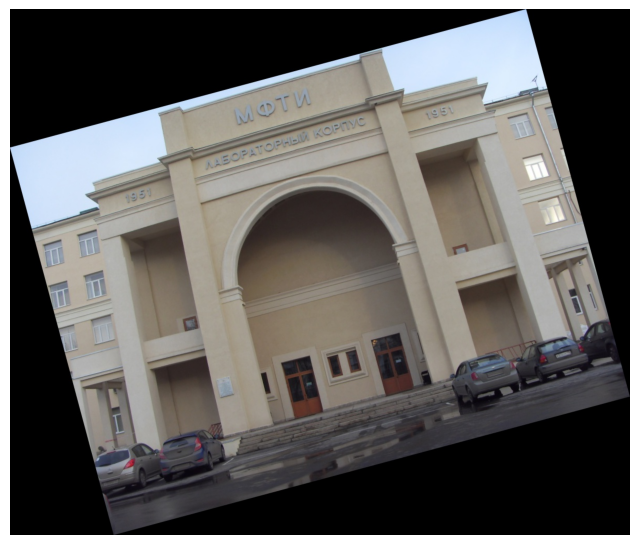

In [52]:
result_image = cv2.imread('task_3/lk_rotate.jpg')
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plot_one_image(result_image)

## Задача №3.2 - Афинные преобразования

Реализуйте функцию, которая применяет афинное преобразование между заданными точками на исходном изображении и преобразует размер получившегося изображения, чтобы оно не обрезалось.

In [46]:
from task_3 import apply_warpAffine

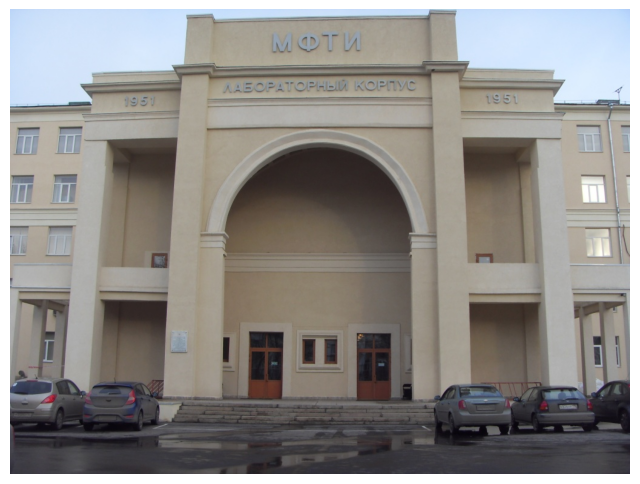

In [47]:
test_image = cv2.imread('task_3/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

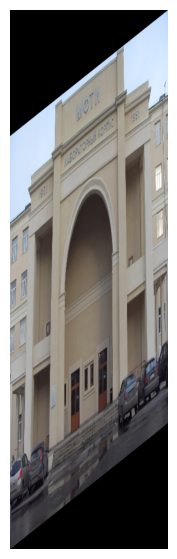

In [53]:
test_point_1 = np.float32([[50, 50], [400, 50], [50, 200]])
test_point_2 = np.float32([[100, 100], [200, 20], [100, 250]]) 
import cv2
import numpy as np
def apply_warpAffine_test(image, points1, points2) -> np.ndarray:
    """
    Применить афинное преобразование согласно переходу точек points1 -> points2 и
    преобразовать размер изображения.

    :param image:
    :param points1:
    :param points2:
    :return: преобразованное изображение
    """
    transformation_matrix = cv2.getAffineTransform(points1, points2)

    # Получаем размеры изображения
    img_height, img_width = image.shape[:2]

    # Определяем углы изображения
    corners = np.array([
        [0, 0],
        [0, img_height],
        [img_width, 0],
        [img_width, img_height]
    ], dtype=np.float32)

    # Применяем преобразование к углам
    ones = np.ones((4, 1), dtype=np.float32)
    corners_homogeneous = np.hstack((corners, ones))
    transformed_corners = np.dot(transformation_matrix, corners_homogeneous.T).T

    # Находим новые границы изображения
    x_min = np.min(transformed_corners[:, 0])
    x_max = np.max(transformed_corners[:, 0])
    y_min = np.min(transformed_corners[:, 1])
    y_max = np.max(transformed_corners[:, 1])

    # Корректируем матрицу преобразования для сдвига
    transformation_matrix[0, 2] -= x_min
    transformation_matrix[1, 2] -= y_min

    # Применяем аффинное преобразование к изображению
    new_width = round(x_max - x_min)
    new_height = round(y_max - y_min)
    transformed_image = cv2.warpAffine(image, transformation_matrix, (new_width, new_height))

    return transformed_image
transformed_image = apply_warpAffine_test(test_image, test_point_1, test_point_2)
plot_one_image(transformed_image)

Проверьте как это должно было получиться

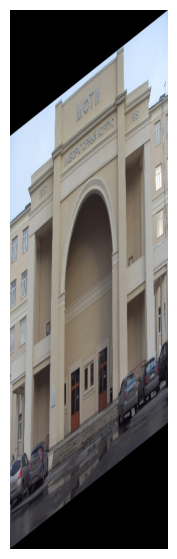

In [54]:
result_image = cv2.imread('task_3/lk_affine.jpg')
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plot_one_image(result_image)